In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xgboost as xgb
import cv2
%matplotlib inline

In [4]:
DATA_DIR = '/home/jeff/Downloads/data/statoil/'
train = pd.read_json(os.path.join(DATA_DIR, 'train.json'))
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')
train.fillna(method='pad', inplace=True)

In [5]:
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


207    40.7129
Name: inc_angle, dtype: float64


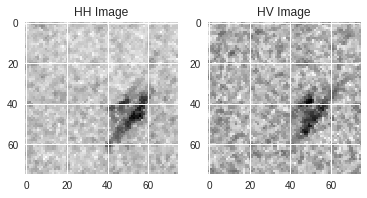

In [22]:
def show_image(df, img_id=None):
    if img_id:
        row = df[df.id == img_id]
    else:
        row = df.sample(n=1)
        
    if row['is_iceberg'].iloc[0] == 1:
        plt.title('iceberg')
    else:
        plt.title('ship')
    
    print(row['inc_angle'])
    plt.subplot(1,2,1)
    plt.imshow(np.reshape(row['band_1'].iloc[0], (75,75)))
    plt.title('HH Image')
    plt.subplot(1,2,2)
    plt.title('HV Image')
    plt.imshow(np.reshape(row['band_2'].iloc[0], (75,75)))
show_image(train)

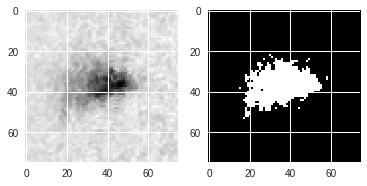

In [8]:
row = train.sample(n=1)
attempts = 0
data = np.float32(np.array(row['band_1'].iloc[0]))
ret, labels, center = cv2.kmeans(data, 2, None, (cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), attempts, cv2.KMEANS_RANDOM_CENTERS)
plt.subplot(1,2,1)
plt.imshow(np.reshape(data,(75,75)))
plt.subplot(1,2,2)
plt.imshow(np.reshape(labels,(75,75)))